# **An analysis of Movie data**
#### Cameron Jones  02/10/2022

<div style="width:100%;text-align: center;"> <img align=middle src="https://5thcolor.files.wordpress.com/2013/05/film-strip.jpg" alt="Heat beating" style="height:300px;margin-top:3rem;"> </div>

## **Introduction**

The following notebook contains anlysis of movie data from the last 40 years. The analysis has been conducted on 6800 movies to understand the influences different movie properties have on the gross revenue from film releases, for example, production companies, lead actor/actress, expendature and genre.

The data was obtained from an open source database that scrapes movie data from IMDb's website.

### Ask

The specific task of this analysis was:
**To understand the influences of different movie properties on its gross revenue.**

**To answer this, the metrics needed to evaluate the data against are:**
* Revenue
* Gross expendature
* Movie title
* Lead actor/actress
* Director
* Production company
* Year of release
* Rating
* Run-time

These metrics are contained in the dataset, however, they weren't all initially usable. Therefore, the data first needed to be prepared for analysis.

### Prepare

Python was used for this analysis so after downloading the data, a Python environment was set up to enable analysis to be performed by completing the following;

1). Libraries were imported to allow analytical functions to be used. Configurations were then set to standardise the execution of certain code.

In [27]:
# Import libraries to work with data

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Sets config of plots

#Import data
df = pd.read_csv(r'./movies.csv')

2). The dataframe was inspected to check the data was imported successfully.

In [28]:
#Inspect dataframe

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


3). Next the dataframe was inspected for any missing data.

In [29]:
#Run check for missing data in df

for col in df.columns:
    number_missing = sum(df[col].isnull())
    print('{} - {}'.format(col, number_missing))

name - 0
rating - 77
genre - 0
year - 0
released - 2
score - 3
votes - 3
director - 0
writer - 3
star - 1
country - 3
budget - 2171
gross - 189
company - 17
runtime - 4


4). After identifing the types of data that were missing, any missing data that would impact the analysis was removed. In this case, all the NA values would prevent accurate correlations being drawn from the data and were therefore removed. An alternative solution to this would have been to manually identify the correct data and fill in the blank values. However, since the dataset is so large, accurate conclusions could still be drawn without this data.

In [30]:
# Drop rows containing NA values
df_complete = df.dropna() #default drops any row containing a NULL value

In [31]:
#Re-run duplicate code to check duplicates have been removed
for col in df_complete.columns:
    new_number_missing = sum(df_complete[col].isnull())
    print('{} - {}'.format(col, new_number_missing))

name - 0
rating - 0
genre - 0
year - 0
released - 0
score - 0
votes - 0
director - 0
writer - 0
star - 0
country - 0
budget - 0
gross - 0
company - 0
runtime - 0


5). The dataframe was then inspected to identify the data types of each column. This was done to ensure the data could be processed effectively.

In [32]:
# Perfrom check on column datatypes

df_complete.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

6). After identifying the incorrect values in the 'year' column, the 'released' column needed to be converted into a string to allow accurate date data to be derived. The astype function was used to transform this column to string data.

In [33]:
#Convert 'released' to string to allow data conversion in new column that is more accurate than current 'year' column

df_complete['released'] = df_complete['released'].astype(str)


7). Finally, the numerical columns were the tidied up, removing uneccessary decimals from the data. The check of data types showed that 'budget', 'gross' and 'votes' columns were all of type float. However, none of these columns contained non-zero decimal values - converting to int eliminated the unneccessary decimals.

In [34]:
#Re-format int columns to remove uneccessary decimals
df_complete['budget'] = df_complete['budget'].astype('int64')
df_complete['gross'] = df_complete['gross'].astype('int64')
df_complete['votes'] = df_complete['votes'].astype('int64')

### Process

Once the data was prepared, it was then proccessed to allow the desired analysis to be performed.

This processing of the dataframe included adding additional columns that provided more accurate date data, extracting accurate information from the availible columns, and removing any duplicated data.

In [35]:
#Set new order of dataframe by the 'gross' value
df_complete.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0


After identifying incorrect values in the 'year' column, a new column was created to extract accurate year data from the 'released' column. This was done by identifying a pattern of four consectutive numbers between 0-9 in the 'released' column and extracting this pattern as an integer.

In [36]:
#Extract pattern of 4 numbers in a row from released column to create 'year_correct' column
df_complete['year_correct'] = df_complete['released'].str.extract(pat = '([0-9]{4})').astype(int)

A check for duplicated data was then performed. This was done by checking for rows with matching 'name' and 'year' entries (some films are re-released under the same name so matching names would not return "real" duplicates).

In [37]:
#Check for any duplicates in film name column that are released in same year to ensure all entries are unique

df_complete[df_complete[['name', 'year']].duplicated()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct


### Analyse

After preparing and processing the data, it was analysed to identify any patterns in the data.

Firstly, the most likely correlation (assumed to be budget and gross expendature) was investigated. This was done by creating a scatter plot, which shows a trend if the two properties are correlated. 

<function matplotlib.pyplot.show(close=None, block=None)>

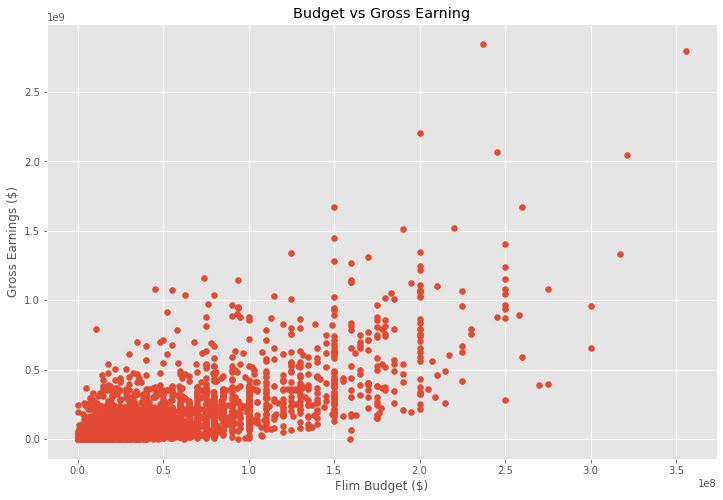

In [38]:
#Begin analysing correlations by creating scatter plots

#Budget vs gross revenue plot

plt.scatter(x=df_complete['budget'], y=df_complete['gross'])
plt.title('Budget vs Gross Earning')
plt.ylabel('Gross Earnings ($)')
plt.xlabel('Flim Budget ($)')

plt.show

The initial scatter plot showed that a trend may be present in the data, however, adding trend lines to the correlation highlighted this more clearly. This was done using the seaborn regression plot, *regplot*.

<AxesSubplot:xlabel='budget', ylabel='gross'>

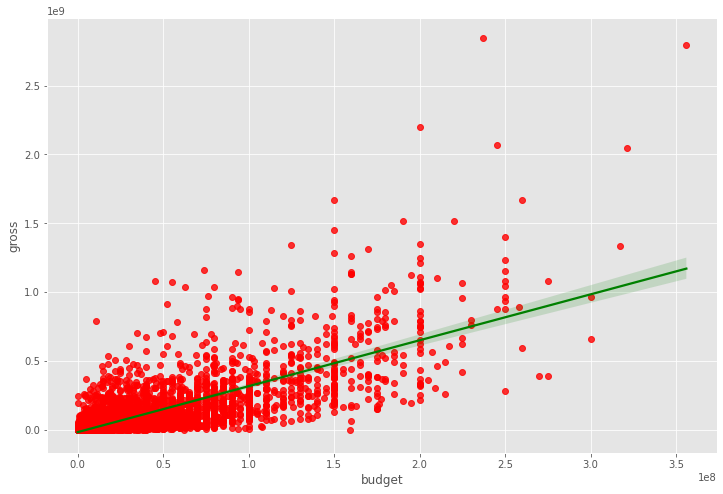

In [39]:
#Create regression plot to show correlation more clearly using seaborn

sns.regplot(x='budget', y='gross', data = df_complete, scatter_kws={"color": "red"}, line_kws={"color": "green"})

To highlight further correlations in the data, a correlation matrix was created. The correlation analysis was performed using the numerical data in the dataframe, showing the correlation value between eech numerical column.

In [40]:
#Positive corelation plotted, use corr to determine statistical correlation for numerical data

df_complete.corr()

,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
year_correct,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

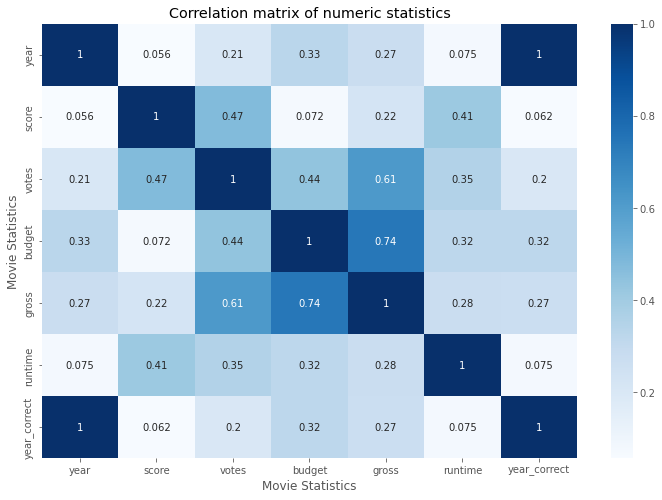

In [41]:
#Corr shows higher correlation between gross and budget
#Plot a correlation matrix to show more clearly
correlation_matrix=df_complete.corr()

sns.heatmap(correlation_matrix, cmap="Blues", annot= True)

plt.title('Correlation matrix of numeric statistics')

plt.ylabel('Movie Statistics')

plt.xlabel('Movie Statistics')

plt.show

As correlations between string and numerical data cannot be drawn with the corr. function, each unique string value was assigned an identifier. This step allowed all values in the table to be analysed for correlations.

In [42]:
#Create numeric representation of string statistics to include in correlation matrix

df_numerical = df_complete

for col_name in df_numerical.columns:
    if (df_numerical[col_name].dtype == 'object'):
        df_numerical[col_name] = df_numerical[col_name].astype('category')
        df_numerical[col_name] = df_numerical[col_name].cat.codes
        
df_numerical

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000,16,2390,1812,47,90000000,426505244,452,124.0,2020
7649,3556,4,0,2020,713,6.5,102000,852,2309,147,47,85000000,319715683,1108,99.0,2020
7650,1153,4,1,2020,904,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101.0,2020
7651,3978,4,1,2020,758,6.8,42000,294,2091,640,6,135000000,111105497,12,100.0,2020


The new numerical dataframe representation was then analysed using corr. to investigate for any further correlations.

<function matplotlib.pyplot.show(close=None, block=None)>

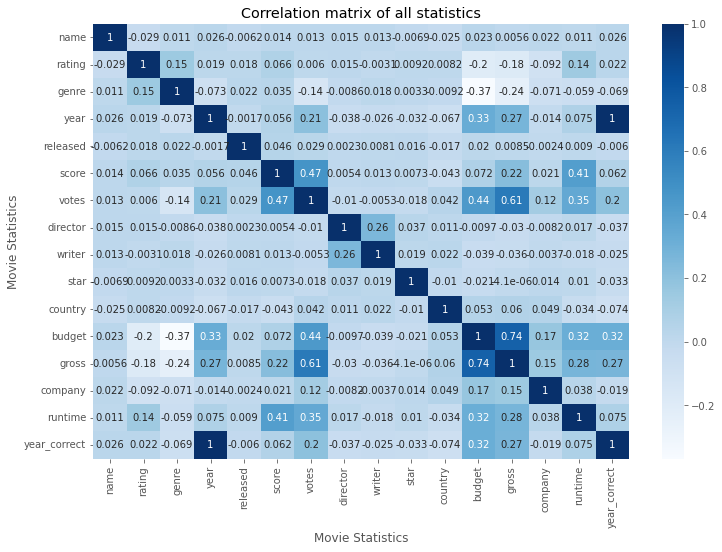

In [26]:
#Following conversion of string data to int representations, carry out correlation analysis on whole df
fcorrelation_matrix=df_numerical.corr()

sns.heatmap(fcorrelation_matrix, cmap="Blues", annot= True)

plt.title('Correlation matrix of all statistics')

plt.ylabel('Movie Statistics')

plt.xlabel('Movie Statistics')

plt.show

This last correlation analysis confirmed that the only major correlation with a film's gross revenue was the budget for the film.